# Assignment 4 - ANLY 535 - 51 - B


## Smitha Shivakumar

### Learning curves has an important role in developing any machine learning algorithm. To understand the effect of changing the hyper parameters and their effect on deep network that we designed, draw two learning curves for Accuracy of test vs. epochs (start from 5 epochs and go up to 75 with the step of 5). Do this analysis two times:
### 1) With Adam algorithm
### 2) With SGD

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
#from keras import optimizers
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


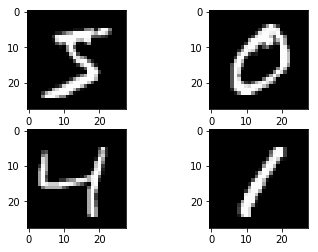

In [2]:

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [3]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
Y_test = y_test 

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Building the baseline model with 16 hidden layers

In [6]:
hidden_layers=16

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layers, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    #sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

# Fitting Neural Net to the Baseline Scenario Model with epochs = 10 

In [7]:
model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1302 - acc: 0.1020 - val_loss: 0.0951 - val_acc: 0.1010
Epoch 2/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0903 - acc: 0.1590 - val_loss: 0.0880 - val_acc: 0.3618
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0856 - acc: 0.3765 - val_loss: 0.0815 - val_acc: 0.3937
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0742 - acc: 0.4005 - val_loss: 0.0665 - val_acc: 0.4518
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0587 - acc: 0.6707 - val_loss: 0.0466 - val_acc: 0.8376
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0371 - acc: 0.9138 - val_loss: 0.0290 - val_acc: 0.9377
Epoch 7/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0238 - acc: 0.9449 - val_loss: 0.0191 - 

## Graphically showing the model's accuracy and loss prediction

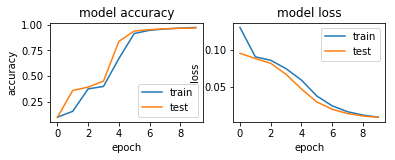

In [8]:
fig.subplots_adjust(hspace=.5)

plt.subplot(2,2,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,2,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


This model shows really good accuracy of 96.09%. However we would like to see how this accuracy and the error component of 3.91% get affected by changes in the input parameters of the model. Before getting into it, we will take a look at the number of correctly and incorrectly predicted values   

## Making the comparisons between the number of correctly and incorrectly predicted values

9676 classified correctly
324 classified incorrectly


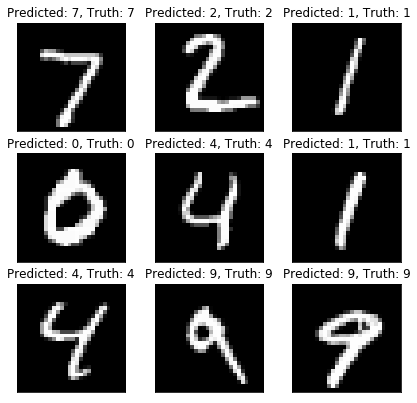

In [9]:
predicted_classes = model.predict_classes(X_test)
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()
# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])


9676 classified correctly
324 classified incorrectly


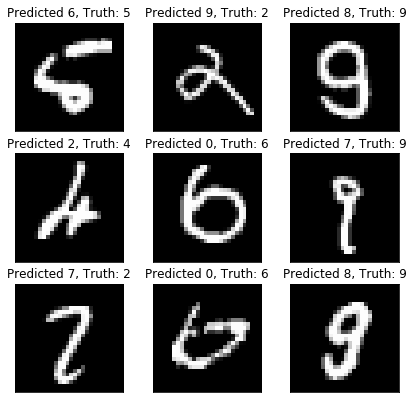

In [10]:
# plot 9 incorrect predictions

print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrectly")

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])




# Building the baseline model with 16 hidden and ADAM optimizer

In [11]:
hidden_layers=16

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layers, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    #sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

## Fitting Neural Net to the Baseline Scenario Model with epochs from 5 to 75

In [12]:
model = baseline_model()

for i in range(5,75)
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=5)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 276us/step - loss: 0.0988 - acc: 0.1132 - val_loss: 0.0884 - val_acc: 0.1970
Epoch 2/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.0701 - acc: 0.6607 - val_loss: 0.0450 - val_acc: 0.9077
Epoch 3/5
60000/60000 [==============================] - 18s 293us/step - loss: 0.0293 - acc: 0.9305 - val_loss: 0.0185 - val_acc: 0.9484
Epoch 4/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.0138 - acc: 0.9567 - val_loss: 0.0107 - val_acc: 0.9619
Epoch 5/5
10000/10000 [==============================] - 1s 111us/step
Baseline Error: 3.21%
Accuracy: 96.79%


## Graphically showing the model's accuracy and loss prediction

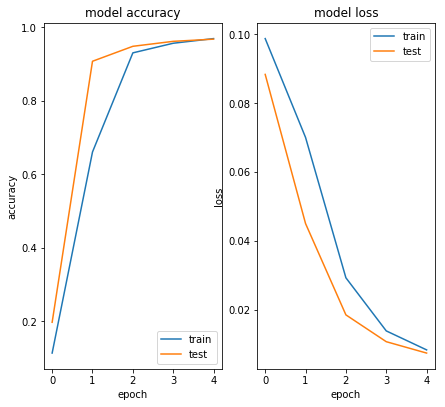

In [13]:
plt.subplot(2,2,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,2,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

# Building the baseline model with 16 hidden and SGD optimizer

In [14]:

hidden_layers=16

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layers, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer= sgd, metrics=['accuracy'])
    return model

### Fitting Neural Net to the Baseline Scenario Model with epochs = 5

In [16]:
from keras import optimizers

model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=75)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.1034 - acc: 0.1056 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 2/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 3/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 4/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0899 - val_acc: 0.1135
Epoch 5/5
10000/10000 [==============================] - 1s 119us/step
Baseline Error: 88.65%
Accuracy: 11.35%


### Graphically showing the model's accuracy and loss prediction

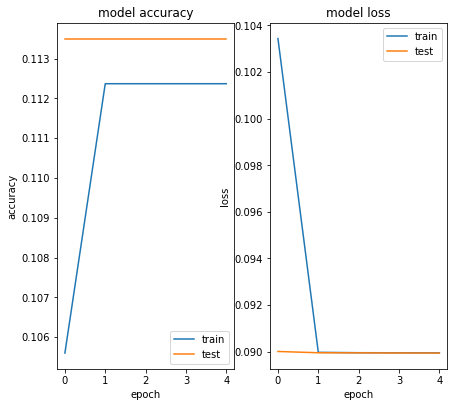

In [17]:
fig.subplots_adjust(hspace=.5)
plt.subplot(2,2,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,2,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## As seen above, ADAM optimizer works much better than SGD optimizer on the model

## The model built using ADAM optimizer had an accuracy of 96.79% with the epoch size of 5 going upto 75 while the model built using SGD had a mere 11.35% accuracy.